# Layer Explaination

## Feature Extraction (Convolution)

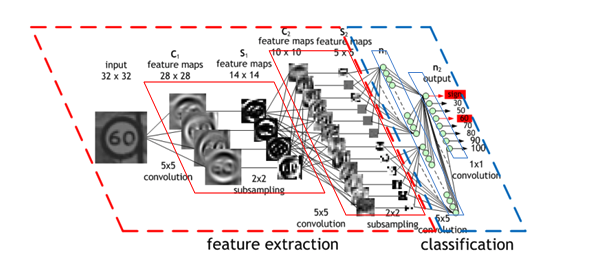

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [5]:
image = X_train[0]

In [6]:
image.shape

(28, 28)

### Reshape For Layer
* [Batch, Height, Width, Channel]
* tf.newaxis

In [8]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

### Convolutional Layer
* tf.keras.layers.Conv2D

In [10]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='VALID', activation='relu')
# kernel_size=3 (==) kernel_size=(3, 3)

In [11]:
image = tf.cast(image, dtype=tf.float32)

In [12]:
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=(1, 1), padding='SAME')
# not exist activation function 

In [13]:
output = layer(image)

### Weight
* {layer}.get_weights()

In [14]:
weight = layer.get_weights()[0]

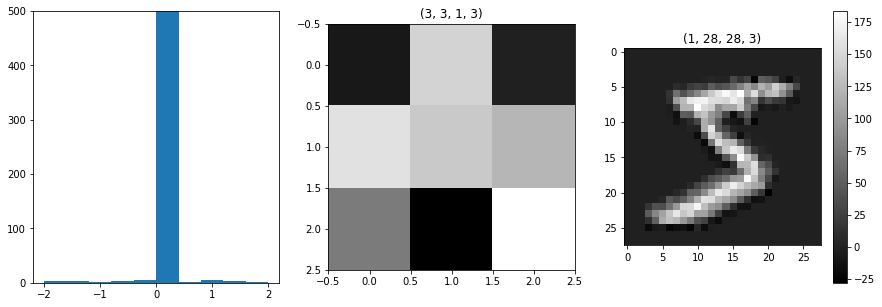

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:, :, 0, 0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

### Activation Function (ReLU)
* tf.keras.layers.ReLU()

In [16]:
layer = tf.keras.layers.ReLU()
output = layer(output)

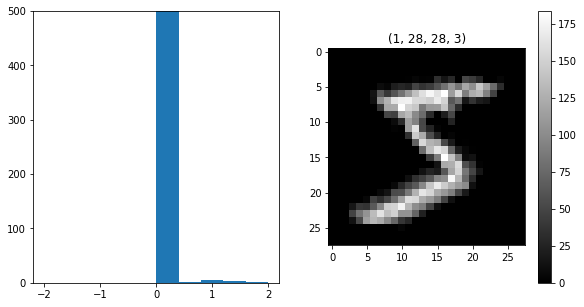

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

### Pooling Layrer
* tf.keras.layers.MaxPool2D

In [18]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [19]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output = layer(output)

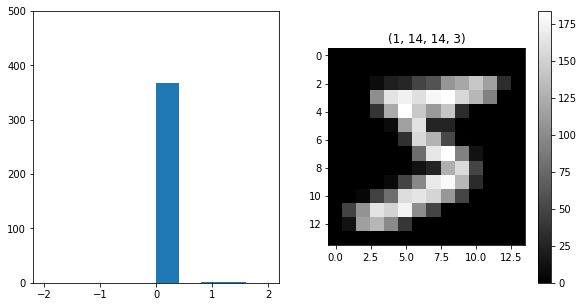

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

In [21]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output = layer(output)

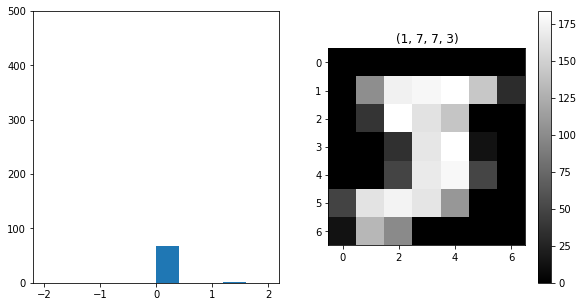

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Classification (Fully Connected, Dense)

### Flatten For Dense Layer
* tf.keras.layers.Flatten()

In [23]:
tf.keras.layers.Flatten()

In [24]:
layer = tf.keras.layers.Flatten()
flatten = layer(output)

In [25]:
flatten.shape

TensorShape([1, 147])

In [26]:
output.shape

TensorShape([1, 7, 7, 3])

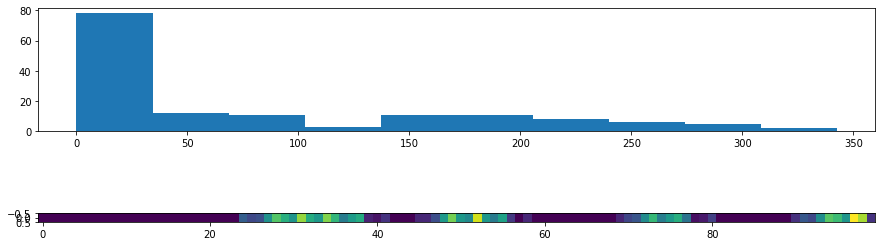

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100])
plt.show()

### Dense Layer
* tf.keras.layers.Dense

In [29]:
tf.keras.layers.Dense(32, activation='relu')

In [30]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(flatten)

In [31]:
output.shape

TensorShape([1, 32])

### DropOut
* tf.keras.layers.Dropout()

In [33]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)